# Outcome Analysis

If we want to measure outliers, or see how the repair profiles have changed, then we need to define the repair outcome profiles per target sequence. First, we will look at all events that occur only one time

We need to find:
- What are the types of events
- Which types can be combined
- How types of different lengths, starting positions, etc can be grouped into a single event

In [1]:
from src.data.load_dataset import load_data_for_sample
from src.util import calculate_sd_of_barcodes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = load_data_for_sample("MB01", raw=True)
df.head(2)

loaded outcomes
We have 86151 unique barcodes covering 18347 genes, producing 513246 outcomes


fraction_per_barcode  \
Alias Gene          Barcode         outcome                                        
MB01  0610009B22Rik 0610009B22Rik-1 DELETION|-10|5||3bp                 0.007105   
                                    INSERTION|-1|-1|G|-1bp              0.001243   

                                                            mutEvents  \
Alias Gene          Barcode         outcome                             
MB01  0610009B22Rik 0610009B22Rik-1 DELETION|-10|5||3bp          2247   
                                    INSERTION|-1|-1|G|-1bp       2247   

                                                            countEvents  
Alias Gene          Barcode         outcome                              
MB01  0610009B22Rik 0610009B22Rik-1 DELETION|-10|5||3bp            5630  
                                    INSERTION|-1|-1|G|-1bp         5630

In [15]:
5630 * 0.001243

6.9980899999999995

In [14]:
df[["fraction_per_barcode"]].groupby("Barcode").sum()

,fraction_per_barcode
Barcode,
0610009B22Rik-1,1.0
0610009B22Rik-2,1.0
0610009B22Rik-3,1.0
0610009B22Rik-4,1.0
0610009B22Rik-5,1.0
...,...
jun-01,1.0
jun-02,1.0
jun-03,1.0


In [18]:
df[(df["fraction_per_barcode"] > 0.01)].groupby("outcome").size()

outcome
DELETION|-10|-1||3bp                                 93
DELETION|-10|0||0bp                                 105
DELETION|-10|114||1bp                                 1
DELETION|-10|115||0bp                                 1
DELETION|-10|116||0bp                                 1
                                                  ...  
TINS|1|3|TATGAAGGAATCAT|-1bp                          1
TINS|1|4|ATAGGCCCCAA|-1bp                             1
TINS|1|5|TCATGGGAAATAGGCCCTCGGTACCTTAATTT|-1bp        1
TINS|1|8|ATAGGAAATAGGAAATAGGAAATAGGAAA|-1bp           1
WT|0|0||-1bp                                      86151
Length: 8427, dtype: int64

<AxesSubplot:xlabel='fraction_per_barcode', ylabel='Count'>

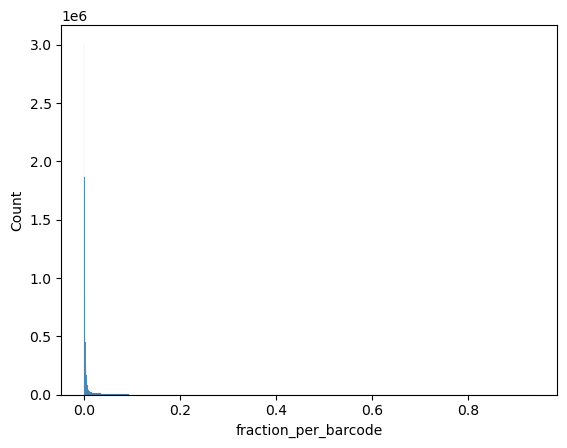

In [4]:
sns.histplot(df["fraction_per_barcode"], bins=1000)

In [2]:
num_barcodes = df.index.get_level_values("Barcode").unique().shape[0]
print("There are ", num_barcodes, "unique barcodes")

There are  86151 unique barcodes


In [3]:
outcome_mean_freq = df["fraction_per_barcode"].groupby("outcome").sum()/num_barcodes
outcome_mean_freq

outcome
DELETION|-10|-1||3bp                  2.235709e-04
DELETION|-10|0||0bp                   3.009321e-04
DELETION|-10|100||0bp                 3.658128e-08
DELETION|-10|102||0bp                 9.012225e-08
DELETION|-10|103||0bp                 5.759821e-08
                                          ...     
TINS|2|9|GGCCTATTTCCCATG|-1bp         6.300449e-09
TINS|2|9|GGCTAATTCCCATGATTTCC|-1bp    2.024569e-08
TINS|2|9|GTCGGG|-1bp                  3.395006e-08
TINS|2|9|TGAGAGGCCTATTTCCCATG|-1bp    3.084584e-08
WT|0|0||-1bp                          6.022803e-01
Name: fraction_per_barcode, Length: 513246, dtype: float64

In [15]:
outcome_sd_freq = calculate_sd_of_barcodes(df["fraction_per_barcode"])
outcome_sd_freq


Num barcodes:  86151
Calculating means
Subtracting means from each outcome
Squaring
Summing the squares
Dividing by the number of barcodes to the get variance
Taking the square root


outcome
DELETION|-10|-1||3bp                  0.000878
DELETION|-10|0||0bp                   0.000988
DELETION|-10|100||0bp                 0.000009
DELETION|-10|102||0bp                 0.000012
DELETION|-10|103||0bp                 0.000009
                                        ...   
TINS|2|9|GGCCTATTTCCCATG|-1bp         0.000002
TINS|2|9|GGCTAATTCCCATGATTTCC|-1bp    0.000006
TINS|2|9|GTCGGG|-1bp                  0.000010
TINS|2|9|TGAGAGGCCTATTTCCCATG|-1bp    0.000009
WT|0|0||-1bp                          0.071719
Name: fraction_per_barcode, Length: 513246, dtype: float64

The coefficient of variation is a standardised measure of dispersion of a probability of frequency distribution. https://en.wikipedia.org/wiki/Coefficient_of_variation. Can use this to compare dispersion among all of the outcomes to see which vary the most

In [17]:
outcomes_cv = outcome_sd_freq / outcome_mean_freq
outcomes_cv

outcome
DELETION|-10|-1||3bp                    3.925408
DELETION|-10|0||0bp                     3.283802
DELETION|-10|100||0bp                 237.829165
DELETION|-10|102||0bp                 133.158416
DELETION|-10|103||0bp                 156.716390
                                         ...    
TINS|2|9|GGCCTATTTCCCATG|-1bp         293.511499
TINS|2|9|GGCTAATTCCCATGATTTCC|-1bp    293.511499
TINS|2|9|GTCGGG|-1bp                  293.511499
TINS|2|9|TGAGAGGCCTATTTCCCATG|-1bp    293.511499
WT|0|0||-1bp                            0.119080
Name: fraction_per_barcode, Length: 513246, dtype: float64

In [18]:
outcome_events = df["mutEvents"].groupby("outcome").sum()
# outcome_events = outcome_events.sort_values(ascending=False)
outcome_events

outcome
DELETION|-10|-1||3bp                   34855570
DELETION|-10|0||0bp                    46216333
DELETION|-10|100||0bp                      2923
DELETION|-10|102||0bp                     22817
DELETION|-10|103||0bp                     10329
                                        ...    
TINS|2|9|GGCCTATTTCCCATG|-1bp              2709
TINS|2|9|GGCTAATTCCCATGATTTCC|-1bp         2356
TINS|2|9|GTCGGG|-1bp                       1615
TINS|2|9|TGAGAGGCCTATTTCCCATG|-1bp         1844
WT|0|0||-1bp                          177149247
Name: mutEvents, Length: 513246, dtype: int64

In [19]:
outcome_counts_one_per_gene = df.groupby(["outcome"]).size()
print("There are", outcome_counts_one_per_gene.shape[0], "unique outcomes")
outcome_counts_one_per_gene = outcome_counts_one_per_gene.sort_values(ascending=False)
outcome_counts_one_per_gene

There are 513246 unique outcomes


outcome
WT|0|0||-1bp                       86151
HDR|-34|1|ATTAAGGTACC|-1bp         86146
DELETION|-4|7||4bp                 86141
DELETION|0|3||2bp                  86105
INSERTION|1|1|A|-1bp               86042
                                   ...  
DELINS|0|3|CCTATTGGCTAT|-1bp           1
DELINS|0|3|CCTATTGGCCTCAT|-1bp         1
DELINS|0|3|CCTATTGGACCTATT|-1bp        1
DELINS|0|3|CCTATTGC|-1bp               1
INSERTION|0|0|CCTCAGGACCT|-1bp         1
Length: 513246, dtype: int64

In [20]:
outcome_counts_one_per_gene_sparsity = outcome_counts_one_per_gene/num_barcodes
outcome_counts_one_per_gene_sparsity

outcome
WT|0|0||-1bp                       1.000000
HDR|-34|1|ATTAAGGTACC|-1bp         0.999942
DELETION|-4|7||4bp                 0.999884
DELETION|0|3||2bp                  0.999466
INSERTION|1|1|A|-1bp               0.998735
                                     ...   
DELINS|0|3|CCTATTGGCTAT|-1bp       0.000012
DELINS|0|3|CCTATTGGCCTCAT|-1bp     0.000012
DELINS|0|3|CCTATTGGACCTATT|-1bp    0.000012
DELINS|0|3|CCTATTGC|-1bp           0.000012
INSERTION|0|0|CCTCAGGACCT|-1bp     0.000012
Length: 513246, dtype: float64

In [46]:
outcome_df = pd.concat([outcome_counts_one_per_gene_sparsity, outcome_counts_one_per_gene, outcome_mean_freq, outcome_sd_freq, outcomes_cv, outcome_events], axis=1)
outcome_df.columns = ["frac_barcodes_with_outcome", "num_barcodes_with_outcome", "mean_freq", "sd_freq", "cv_freq", "mutEvents"]
outcome_df = pd.concat([outcome_df, outcome_df.index.to_series().str.split("|", expand=True).rename(columns={0: "Type", 1: "delRelativeStart", 2: "delRelativeEnd", 3: "misc", 4: "homologyLength"})], axis=1)
outcome_df[["delRelativeStart", "delRelativeEnd"]] = outcome_df[["delRelativeStart", "delRelativeEnd"]].astype(int)
outcome_df

,frac_barcodes_with_outcome,num_barcodes_with_outcome,mean_freq,sd_freq,cv_freq,mutEvents,Type,delRelativeStart,delRelativeEnd,misc,homologyLength
outcome,,,,,,,,,,,
WT|0|0||-1bp,1.000000,86151,6.022803e-01,0.071719,0.119080,177149247,WT,0,0,,-1bp
HDR|-34|1|ATTAAGGTACC|-1bp,0.999942,86146,6.973313e-02,0.023980,0.343886,177147837,HDR,-34,1,ATTAAGGTACC,-1bp
DELETION|-4|7||4bp,0.999884,86141,4.922249e-02,0.015343,0.311699,177146602,DELETION,-4,7,,4bp
DELETION|0|3||2bp,0.999466,86105,3.561241e-02,0.012025,0.337672,177137248,DELETION,0,3,,2bp
INSERTION|1|1|A|-1bp,0.998735,86042,2.529379e-02,0.008916,0.352494,177117272,INSERTION,1,1,A,-1bp
...,...,...,...,...,...,...,...,...,...,...,...
DELINS|0|3|CCTATTGGCTAT|-1bp,0.000012,1,1.843719e-08,0.000005,293.511499,2027,DELINS,0,3,CCTATTGGCTAT,-1bp
DELINS|0|3|CCTATTGGCCTCAT|-1bp,0.000012,1,1.097742e-08,0.000003,293.511499,2171,DELINS,0,3,CCTATTGGCCTCAT,-1bp
DELINS|0|3|CCTATTGGACCTATT|-1bp,0.000012,1,1.750038e-08,0.000005,293.511499,2519,DELINS,0,3,CCTATTGGACCTATT,-1bp


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


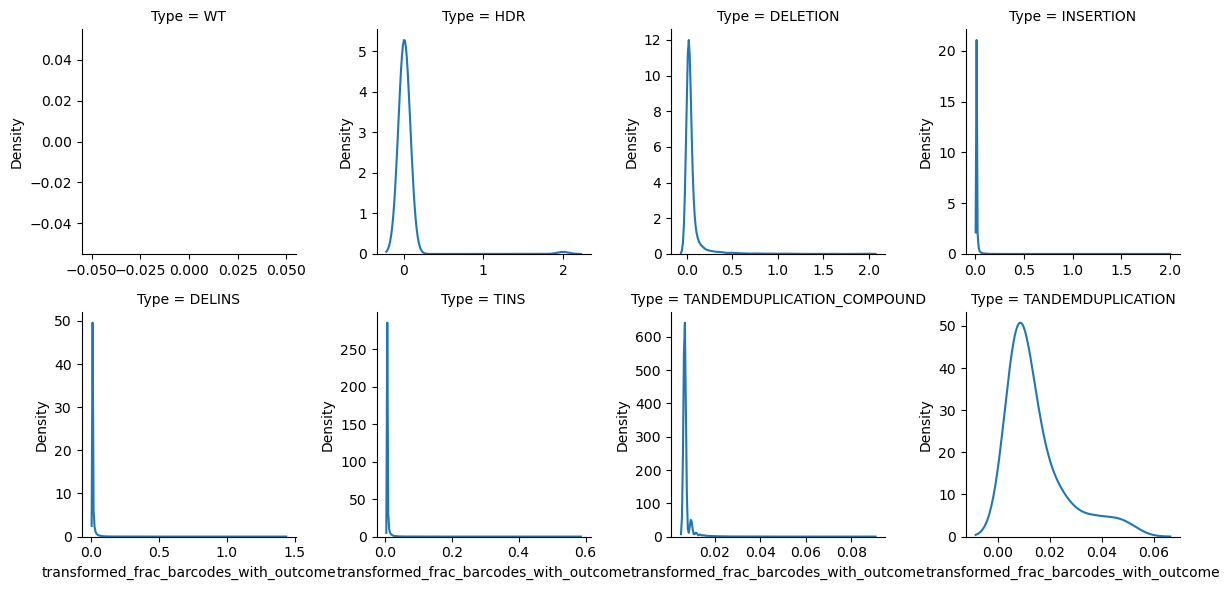

In [166]:
outcome_df["transformed_frac_barcodes_with_outcome"] = 2 * np.sqrt(outcome_df["frac_barcodes_with_outcome"])
g = sns.FacetGrid(data=outcome_df, col="Type", col_wrap=4, sharey=False, sharex=False)
g.map_dataframe(sns.kdeplot, x="transformed_frac_barcodes_with_outcome")
plt.show()


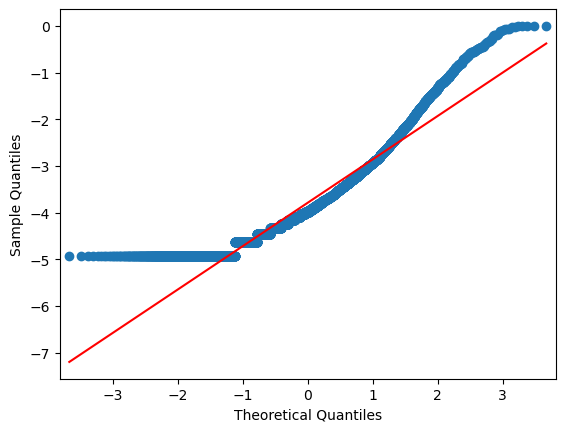

In [183]:
import statsmodels.api as sm

sm.qqplot(np.log10(outcome_df[outcome_df["Type"] == "DELETION"]["frac_barcodes_with_outcome"]), line='s')

In [168]:
outcome_df["transformed_frac_barcodes_with_outcome"].max()

2.0

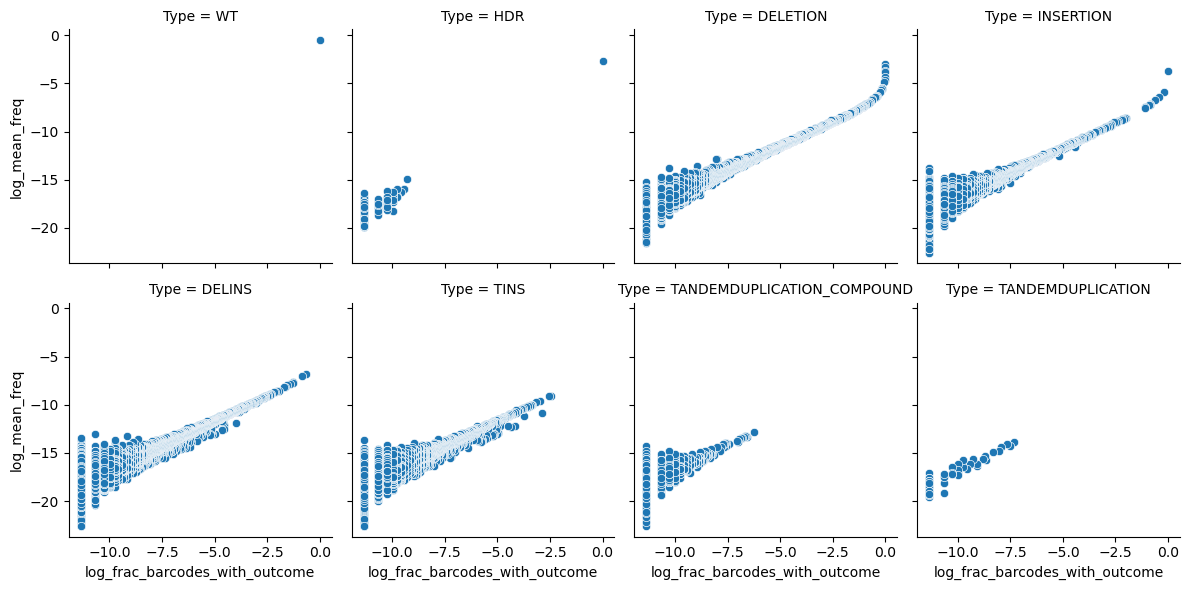

In [155]:
outcome_df["log_mean_freq"] = np.log(outcome_df["mean_freq"])
outcome_df["log_frac_barcodes_with_outcome"] = np.log(outcome_df["frac_barcodes_with_outcome"])
g = sns.FacetGrid(data=outcome_df, col="Type", col_wrap=4)
g.map_dataframe(sns.scatterplot, x="log_frac_barcodes_with_outcome", y="log_mean_freq")
plt.show()

# sns.scatterplot(data=outcome_df, y="mean_freq", x="frac_barcodes_with_outcome", hue="Type")

<AxesSubplot:xlabel='frac_barcodes_with_outcome', ylabel='Type'>

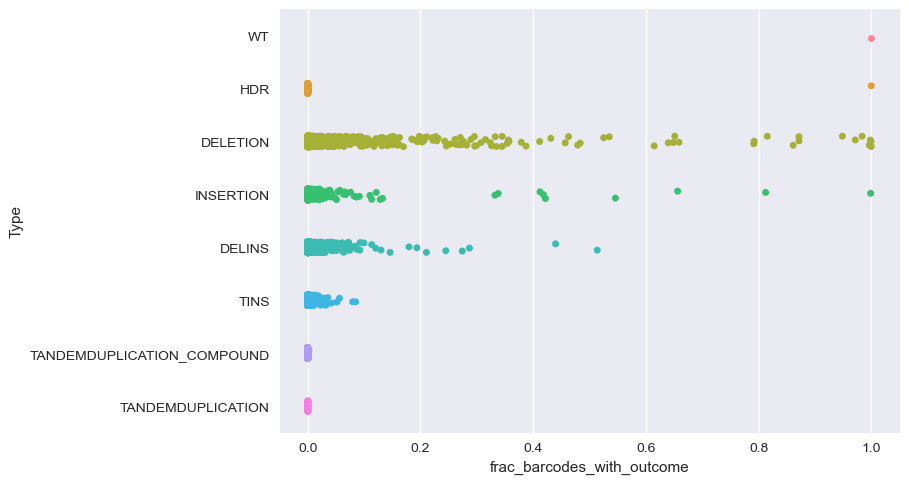

In [111]:
sns.stripplot(data=outcome_df, y="Type", x="frac_barcodes_with_outcome")

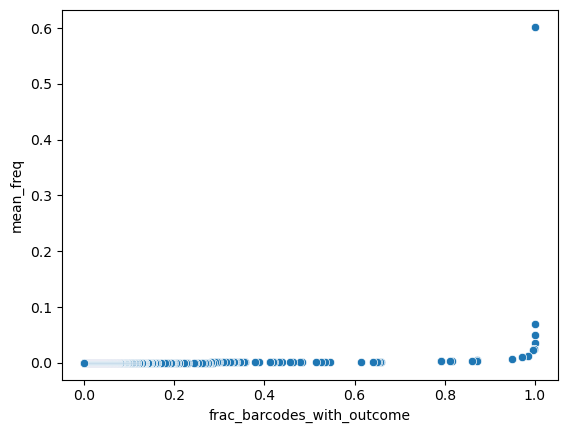

In [134]:
sns.scatterplot(data=outcome_df, x="frac_barcodes_with_outcome", y="mean_freq")
plt.show()

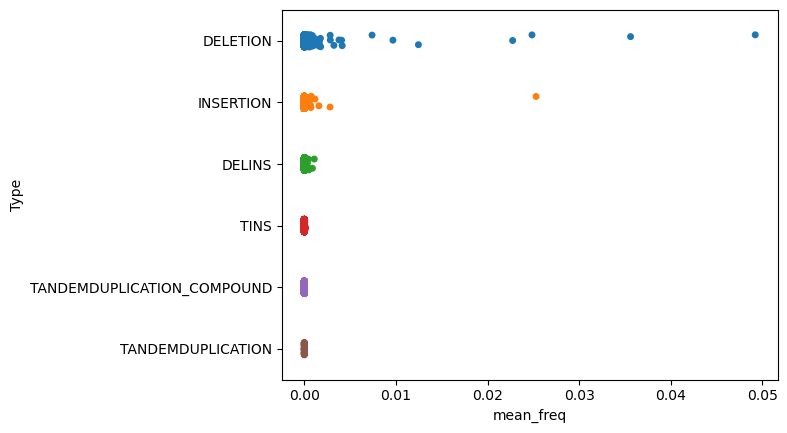

In [131]:
sns.stripplot(data=outcome_df[~outcome_df["Type"].isin(["WT", "HDR"])], y="Type", x="mean_freq")
plt.show()

In [71]:
deletions = outcome_df[outcome_df["Type"] == "DELETION"]
deletions["size"] = deletions["delRelativeEnd"] - deletions["delRelativeStart"]
deletions["homologyLength"] = deletions["homologyLength"].apply(lambda x: int(x[:-2]))
deletions["Frequent"] = deletions["frac_barcodes_with_outcome"] > 0.6
deletions.head()


/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_34785/2716632915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deletions["size"] = deletions["delRelativeEnd"] - deletions["delRelativeStart"]
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_34785/2716632915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deletions["homologyLength"] = deletions["homologyLength"].apply(lambda x: int(x[:-2]))
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_34785/2716632915.py:4: Setting

,frac_barcodes_with_outcome,num_barcodes_with_outcome,mean_freq,sd_freq,cv_freq,mutEvents,Type,delRelativeStart,delRelativeEnd,misc,homologyLength,size,Frequent
outcome,,,,,,,,,,,,,
DELETION|-4|7||4bp,0.999884,86141,0.049222,0.015343,0.311699,177146602,DELETION,-4,7,,4,11,True
DELETION|0|3||2bp,0.999466,86105,0.035612,0.012025,0.337672,177137248,DELETION,0,3,,2,3,True
DELETION|0|1||1bp,0.998340,86008,0.024853,0.009322,0.375095,177105920,DELETION,0,1,,1,1,True
DELETION|-1|5||3bp,0.996495,85849,0.022740,0.009275,0.407858,177056333,DELETION,-1,5,,3,6,True
DELETION|0|6||0bp,0.983552,84734,0.012455,0.006465,0.519064,176588873,DELETION,0,6,,0,6,True


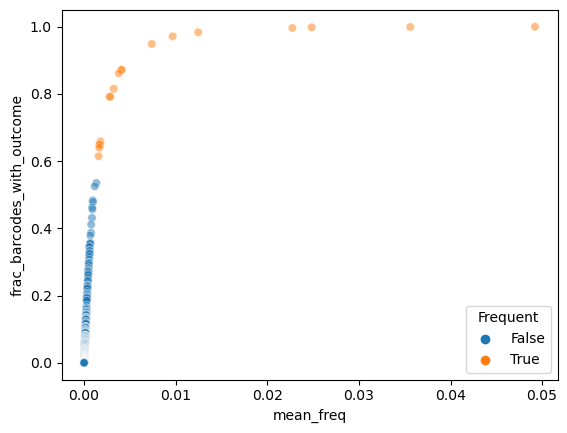

In [103]:
# g = sns.JointGrid(data=deletions, x="mean_freq", y="frac_barcodes_with_outcome", hue="Frequent")
# # add scatter plot layer
# g.plot_joint(sns.scatterplot)
# g.plot_marginals(sns.kdeplot)

sns.scatterplot(data=deletions, x="mean_freq", y="frac_barcodes_with_outcome", hue="Frequent", alpha=.5)
plt.show()

In [91]:
deletions["Frequent"].sum()

18

In [141]:
from scipy.stats import spearmanr

spearmanr(deletions[deletions["Frequent"]]["frac_barcodes_with_outcome"], deletions[deletions["Frequent"]]["mean_freq"])

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [92]:
deletions[deletions["Frequent"]]

,frac_barcodes_with_outcome,num_barcodes_with_outcome,mean_freq,sd_freq,cv_freq,mutEvents,Type,delRelativeStart,delRelativeEnd,misc,homologyLength,size,Frequent
outcome,,,,,,,,,,,,,
DELETION|-4|7||4bp,0.999884,86141,0.049222,0.015343,0.311699,177146602,DELETION,-4,7,,4,11,True
DELETION|0|3||2bp,0.999466,86105,0.035612,0.012025,0.337672,177137248,DELETION,0,3,,2,3,True
DELETION|0|1||1bp,0.998340,86008,0.024853,0.009322,0.375095,177105920,DELETION,0,1,,1,1,True
DELETION|-1|5||3bp,0.996495,85849,0.022740,0.009275,0.407858,177056333,DELETION,-1,5,,3,6,True
DELETION|0|6||0bp,0.983552,84734,0.012455,0.006465,0.519064,176588873,DELETION,0,6,,0,6,True
DELETION|-2|2||2bp,0.971399,83687,0.009671,0.005492,0.567864,175978675,DELETION,-2,2,,2,4,True
DELETION|-11|2||3bp,0.948602,81723,0.007393,0.004832,0.653556,174626011,DELETION,-11,2,,3,13,True
DELETION|-10|5||3bp,0.871714,75099,0.004134,0.003461,0.837278,167830858,DELETION,-10,5,,3,15,True
DELETION|-1|6||2bp,0.871609,75090,0.004066,0.003403,0.836948,167920464,DELETION,-1,6,,2,7,True


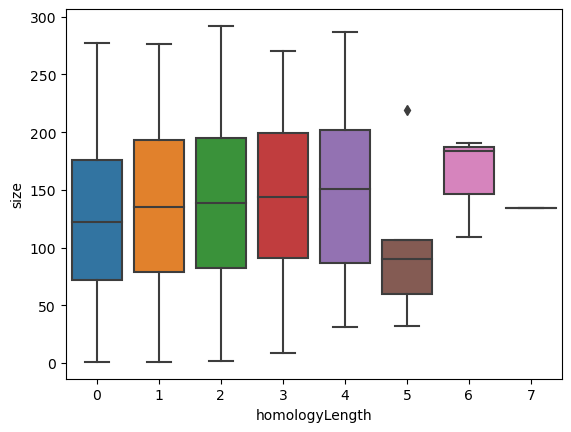

In [101]:
sns.boxplot(data=deletions[~deletions["Frequent"]], x="homologyLength", y="size")
plt.show()

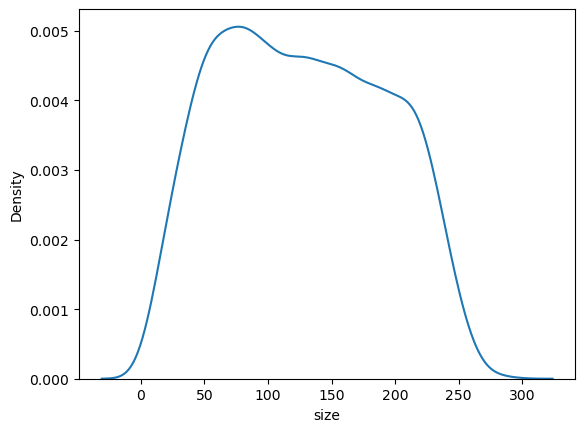

In [113]:
sns.kdeplot(data=deletions[~deletions["Frequent"]], x="size")
plt.show()

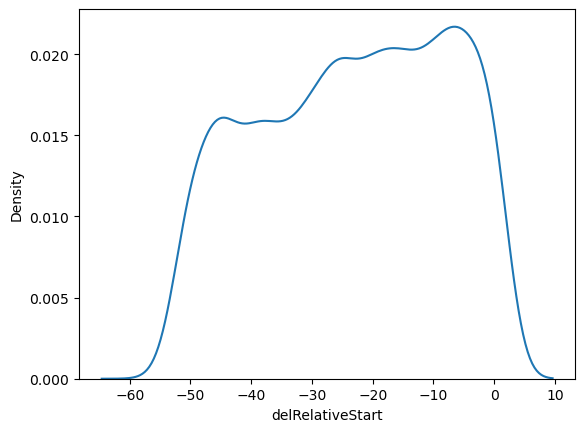

In [112]:
sns.kdeplot(data=deletions[~deletions["Frequent"]], x="delRelativeStart")
plt.show()

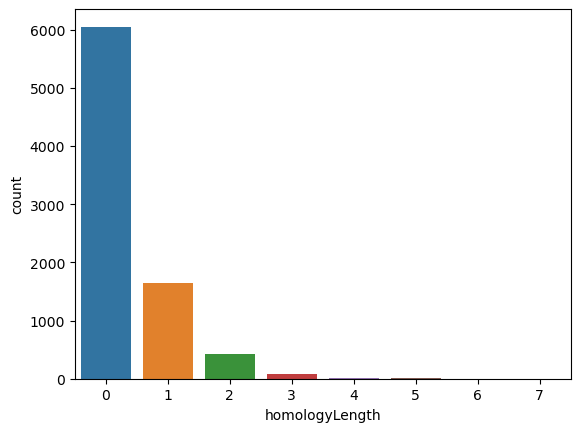

In [116]:
sns.countplot(data=deletions[~deletions["Frequent"]], x="homologyLength")
plt.show()

In [118]:
common_deletions = deletions[deletions["Frequent"]].index.get_level_values("outcome")
common_deletions

Index(['DELETION|-4|7||4bp', 'DELETION|0|3||2bp', 'DELETION|0|1||1bp',
       'DELETION|-1|5||3bp', 'DELETION|0|6||0bp', 'DELETION|-2|2||2bp',
       'DELETION|-11|2||3bp', 'DELETION|-10|5||3bp', 'DELETION|-1|6||2bp',
       'DELETION|-3|0||1bp', 'DELETION|-10|2||1bp', 'DELETION|-10|6||2bp',
       'DELETION|-6|6||2bp', 'DELETION|-14|8||2bp', 'DELETION|-8|8||1bp',
       'DELETION|0|4||0bp', 'DELETION|0|10||1bp', 'DELETION|-13|17||3bp'],
      dtype='object', name='outcome')

In [127]:
rare_deletions = deletions[~deletions["Frequent"]]
rare_deletions[["size", "homologyLength"]].groupby(["size", "homologyLength"]).sum()

,homologyLength
size,
1,1
2,2
3,1
4,3
5,3
...,...
276,3
277,0
282,2


In [122]:
insertions = outcome_df[outcome_df["Type"] == "INSERTION"]
insertions["size"] = insertions["misc"].apply(lambda x: len(x))
insertions["Frequent"] = insertions["frac_barcodes_with_outcome"] > 0.3
insertions.head()

/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_34785/2647999202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insertions["size"] = insertions["misc"].apply(lambda x: len(x))
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_34785/2647999202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insertions["Frequent"] = insertions["frac_barcodes_with_outcome"] > 0.3


,frac_barcodes_with_outcome,num_barcodes_with_outcome,mean_freq,sd_freq,cv_freq,mutEvents,Type,delRelativeStart,delRelativeEnd,misc,homologyLength,size,Frequent
outcome,,,,,,,,,,,,,
INSERTION|1|1|A|-1bp,0.998735,86042,0.025294,0.008916,0.352494,177117272,INSERTION,1,1,A,-1bp,1,True
INSERTION|0|0|G|-1bp,0.812388,69988,0.002812,0.002658,0.945441,160622902,INSERTION,0,0,G,-1bp,1,True
INSERTION|0|0|T|-1bp,0.656324,56543,0.001593,0.002035,1.277124,137890740,INSERTION,0,0,T,-1bp,1,True
INSERTION|0|0|GG|-1bp,0.545879,47028,0.001164,0.001803,1.548642,118848065,INSERTION,0,0,GG,-1bp,2,True
INSERTION|1|1|ATA|-1bp,0.421759,36335,0.000754,0.001416,1.876676,95525271,INSERTION,1,1,ATA,-1bp,3,True


In [124]:
insertions[insertions["Frequent"]]

,frac_barcodes_with_outcome,num_barcodes_with_outcome,mean_freq,sd_freq,cv_freq,mutEvents,Type,delRelativeStart,delRelativeEnd,misc,homologyLength,size,Frequent
outcome,,,,,,,,,,,,,
INSERTION|1|1|A|-1bp,0.998735,86042,0.025294,0.008916,0.352494,177117272,INSERTION,1,1,A,-1bp,1,True
INSERTION|0|0|G|-1bp,0.812388,69988,0.002812,0.002658,0.945441,160622902,INSERTION,0,0,G,-1bp,1,True
INSERTION|0|0|T|-1bp,0.656324,56543,0.001593,0.002035,1.277124,137890740,INSERTION,0,0,T,-1bp,1,True
INSERTION|0|0|GG|-1bp,0.545879,47028,0.001164,0.001803,1.548642,118848065,INSERTION,0,0,GG,-1bp,2,True
INSERTION|1|1|ATA|-1bp,0.421759,36335,0.000754,0.001416,1.876676,95525271,INSERTION,1,1,ATA,-1bp,3,True
INSERTION|0|0|C|-1bp,0.417999,36011,0.000721,0.001390,1.927551,94390400,INSERTION,0,0,C,-1bp,1,True
INSERTION|1|1|AA|-1bp,0.412183,35510,0.000684,0.001274,1.862908,93008426,INSERTION,1,1,AA,-1bp,2,True
INSERTION|-1|-1|TCC|-1bp,0.337942,29114,0.000579,0.001301,2.246093,78284248,INSERTION,-1,-1,TCC,-1bp,3,True
INSERTION|-1|-1|G|-1bp,0.332196,28619,0.000523,0.001139,2.179646,76478242,INSERTION,-1,-1,G,-1bp,1,True


In [123]:
common_insertions = insertions[insertions["Frequent"]].index.get_level_values("outcome")
common_insertions

Index(['INSERTION|1|1|A|-1bp', 'INSERTION|0|0|G|-1bp', 'INSERTION|0|0|T|-1bp',
       'INSERTION|0|0|GG|-1bp', 'INSERTION|1|1|ATA|-1bp',
       'INSERTION|0|0|C|-1bp', 'INSERTION|1|1|AA|-1bp',
       'INSERTION|-1|-1|TCC|-1bp', 'INSERTION|-1|-1|G|-1bp'],
      dtype='object', name='outcome')